In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests 
import pandas as pd 
import numpy as np 
import random 

from IPython.display import display_html
import pandas as pd
import numpy as np
    

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

from IPython.display import Image 
from IPython.core.display import HTML 

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

# All requested packages already installed.



In [2]:
#cities in Greece
source = requests.get('https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Greece').text
Bsoup=BeautifulSoup(source,'lxml')
print(Bsoup.title)
from IPython.display import display_html
tab = str(Bsoup.table)
display_html(tab,raw=True)

<title>List of cities and towns in Greece - Wikipedia</title>


Rank,City,Census 1991,Census 2001,Census 2011,Region
1,Athens 1 *,"772,072","745,514","664,046",Attica
2,Thessaloniki 2 *,"383,967","363,987","315,196",Central Macedonia
3,Patras 8 *,"152,570","160,400","167,446",Western Greece
4,"Piraeus 1,3","182,671","175,697","163,688",Attica
5,Larissa,"112,777","124,394","144,651",Thessaly
6,Heraklion,"115,270","130,914","140,730",Crete
7,Peristeri 1,"137,288","137,918","139,981",Attica
8,Kallithea 1,"194,233","109,609","100,641",Attica
9,Acharnes 1,"61,052","75,329","99,346",Attica
10,Kalamaria 2,"80,698","87,255","91,279",Central Macedonia


In [3]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Rank,City,Census 1991,Census 2001,Census 2011,Region
0,1,Athens 1 *,772072,745514,664046,Attica
1,2,Thessaloniki 2 *,383967,363987,315196,Central Macedonia
2,3,Patras 8 *,152570,160400,167446,Western Greece
3,4,"Piraeus 1,3",182671,175697,163688,Attica
4,5,Larissa,112777,124394,144651,Thessaly


In [4]:
df1 = df[df.Region != 'Not assigned']

df2 = df1.groupby(['Census 2011','Region'], sort=False).agg(','.join) #census 2011 refers to the year in which population was last counted for the cities 
df2.reset_index (inplace=True)

df2['City'] = np.where(df2['City'] == 'Not assigned',df2['Region'], df2['City'])

df2

,Census 2011,Region,City
0,664046,Attica,Athens 1 *
1,315196,Central Macedonia,Thessaloniki 2 *
2,167446,Western Greece,Patras 8 *
3,163688,Attica,"Piraeus 1,3"
4,144651,Thessaly,Larissa
5,140730,Crete,Heraklion
6,139981,Attica,Peristeri 1
7,100641,Attica,Kallithea 1
8,99346,Attica,Acharnes 1
9,91279,Central Macedonia,Kalamaria 2


In [5]:
df3 = df2[df2['Region'].str.contains('Crete',regex=False)] #finding only Crete information on cities and census 
df3

,Census 2011,Region,City
5,140730,Crete,Heraklion
40,53910,Crete,Chania
61,32468,Crete,Rethymno
129,12925,Crete,Nea Alikarnassos 7
131,12606,Crete,Gazi 7
132,12355,Crete,Ierapetra
136,11421,Crete,Agios Nikolaos


In [6]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4ef12edd543040598978931dfbf832e0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_WIB5HqEW_KXBwO4giYnt1h9Ryb6P5PAcKU3V7RUiC4m',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4ef12edd543040598978931dfbf832e0.get_object(Bucket='capstonproject-donotdelete-pr-zolzlb7jgvvzj3',Key='gr.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Athens,37.983333,23.733333,Greece,GR,Attikí,primary,3242000.0,729137.0
1,Thessaloníki,40.643615,22.930864,Greece,GR,Kentrikí Makedonía,admin,828000.0,354290.0
2,Piraeus,37.961389,23.638889,Greece,GR,Attikí,minor,466065.0,175697.0
3,Pátra,38.244444,21.734444,Greece,GR,Dytikí Elláda,admin,163360.0,155799.0
4,Irákleio,35.338082,25.133029,Greece,GR,Crete,admin,137154.0,131654.0


In [7]:
lat_lon = df_data_2
lat_lon.head(10)

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Athens,37.983333,23.733333,Greece,GR,Attikí,primary,3242000.0,729137.0
1,Thessaloníki,40.643615,22.930864,Greece,GR,Kentrikí Makedonía,admin,828000.0,354290.0
2,Piraeus,37.961389,23.638889,Greece,GR,Attikí,minor,466065.0,175697.0
3,Pátra,38.244444,21.734444,Greece,GR,Dytikí Elláda,admin,163360.0,155799.0
4,Irákleio,35.338082,25.133029,Greece,GR,Crete,admin,137154.0,131654.0
5,Lárisa,39.636889,22.417611,Greece,GR,Thessalía,admin,128758.0,111487.0
6,Áno Vólos,39.379361,22.981806,Greece,GR,Thessalía,NaN,110632.0,84425.0
7,Ioánnina,39.664861,20.851889,Greece,GR,Ípeiros,admin,86304.0,64012.0
8,Chaniá,35.511236,24.029210,Greece,GR,Crete,minor,78728.0,54565.0
9,Agrínio,38.621889,21.409778,Greece,GR,Dytikí Elláda,minor,75233.0,43525.0


In [8]:
lat_lon.columns = ['City','Latitude','Longitude','Country','Iso2','Region','Capital','Population','Pop_proper']
lat_lon.head(10)

,City,Latitude,Longitude,Country,Iso2,Region,Capital,Population,Pop_proper
0,Athens,37.983333,23.733333,Greece,GR,Attikí,primary,3242000.0,729137.0
1,Thessaloníki,40.643615,22.930864,Greece,GR,Kentrikí Makedonía,admin,828000.0,354290.0
2,Piraeus,37.961389,23.638889,Greece,GR,Attikí,minor,466065.0,175697.0
3,Pátra,38.244444,21.734444,Greece,GR,Dytikí Elláda,admin,163360.0,155799.0
4,Irákleio,35.338082,25.133029,Greece,GR,Crete,admin,137154.0,131654.0
5,Lárisa,39.636889,22.417611,Greece,GR,Thessalía,admin,128758.0,111487.0
6,Áno Vólos,39.379361,22.981806,Greece,GR,Thessalía,NaN,110632.0,84425.0
7,Ioánnina,39.664861,20.851889,Greece,GR,Ípeiros,admin,86304.0,64012.0
8,Chaniá,35.511236,24.029210,Greece,GR,Crete,minor,78728.0,54565.0
9,Agrínio,38.621889,21.409778,Greece,GR,Dytikí Elláda,minor,75233.0,43525.0


In [9]:
lat_lon.rename(columns={'Region':'Region'},inplace=True) #merge the two tables of latitude and longitude with boroughs and neighborhood
df_new = pd.merge(df3,lat_lon,on='Region')
df_new.head()

,Census 2011,Region,City_x,City_y,Latitude,Longitude,Country,Iso2,Capital,Population,Pop_proper
0,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,131654.0
1,140730,Crete,Heraklion,Chaniá,35.511236,24.029210,Greece,GR,minor,78728.0,54565.0
2,140730,Crete,Heraklion,Siteía,35.208507,26.103024,Greece,GR,minor,8833.0,8707.0
3,140730,Crete,Heraklion,Ágios Nikólaos,35.191064,25.715244,Greece,GR,minor,NaN,NaN
4,140730,Crete,Heraklion,Palaióchora,35.231328,23.681271,Greece,GR,minor,NaN,NaN


In [10]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_airports_in_Crete').text #airport
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of airports in Crete - Wikipedia</title>


Name,Location,Use,ICAO,IATA,Coordinates
Heraklion International Airport,Heraklion,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E﻿ / 35.33972; 25.18028
Chania International Airport,Chania,Civil/Military,LGSA,CHQ,35°31′54″N 024°08′59″E﻿ / ﻿35.53167°N 24.14972°E﻿ / 35.53167; 24.14972
Sitia Public Airport,Sitia,Civil,LGST,JSH,35°12′57.99″N 26°06′04.77″E﻿ / ﻿35.2161083°N 26.1013250°E﻿ / 35.2161083; 26.1013250
Kasteli Airport,Kastelli,Military,LGTL,–,35°11′36.40″N 25°19′41.10″E﻿ / ﻿35.1934444°N 25.3280833°E﻿ / 35.1934444; 25.3280833
Maleme Airport,Maleme,Civil,–,–,35°31′45.70″N 23°49′56.23″E﻿ / ﻿35.5293611°N 23.8322861°E﻿ / 35.5293611; 23.8322861
Tympaki Airport,Tympaki,Military,–,–,35°03′48.74″N 24°45′57.23″E﻿ / ﻿35.0635389°N 24.7658972°E﻿ / 35.0635389; 24.7658972


In [11]:
dfs = pd.read_html(tab)
df_air=dfs[0]
df_air.head()

,Name,Location,Use,ICAO,IATA,Coordinates
0,Heraklion International Airport,Heraklion,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
1,Chania International Airport,Chania,Civil/Military,LGSA,CHQ,35°31′54″N 024°08′59″E﻿ / ﻿35.53167°N 24.14972°E
2,Sitia Public Airport,Sitia,Civil,LGST,JSH,35°12′57.99″N 26°06′04.77″E﻿ / ﻿35.2161083°N 2...
3,Kasteli Airport,Kastelli,Military,LGTL,–,35°11′36.40″N 25°19′41.10″E﻿ / ﻿35.1934444°N 2...
4,Maleme Airport,Maleme,Civil,–,–,35°31′45.70″N 23°49′56.23″E﻿ / ﻿35.5293611°N 2...


In [72]:
df_air.rename (columns={'Location':'City_x'},inplace=True) #merge the two tables of latitude and longitude with boroughs and neighborhood
df_all = pd.merge(df_new,df_air,on='City_x')
df_all.head()
df.shape

(144, 6)

In [21]:
df_all

,Region,City_x,City_y,Latitude,Longitude,Country,Population,Name,IATA,Coordinates
0,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,137154.0,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
1,Crete,Heraklion,Chaniá,35.511236,24.029210,Greece,78728.0,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
2,Crete,Heraklion,Siteía,35.208507,26.103024,Greece,8833.0,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
3,Crete,Heraklion,Ágios Nikólaos,35.191064,25.715244,Greece,NaN,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
4,Crete,Heraklion,Palaióchora,35.231328,23.681271,Greece,NaN,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
5,Crete,Heraklion,Kastrí,34.834530,24.086424,Greece,NaN,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
6,Crete,Heraklion,Pezá,35.218060,25.192926,Greece,NaN,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
7,Crete,Heraklion,Geráni,35.516772,23.878027,Greece,NaN,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
8,Crete,Heraklion,Pérama,35.369525,24.703879,Greece,NaN,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
9,Crete,Heraklion,Kastélli,35.208387,25.338395,Greece,NaN,Heraklion International Airport,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E


In [95]:
df_all

,Census 2011,Region,City_x,City_y,Latitude,Longitude,Country,Iso2,Capital,Population,Pop_proper,Name,Use,ICAO,IATA,Coordinates
0,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,131654.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
1,140730,Crete,Heraklion,Chaniá,35.511236,24.029210,Greece,GR,minor,78728.0,54565.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
2,140730,Crete,Heraklion,Siteía,35.208507,26.103024,Greece,GR,minor,8833.0,8707.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
3,140730,Crete,Heraklion,Ágios Nikólaos,35.191064,25.715244,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
4,140730,Crete,Heraklion,Palaióchora,35.231328,23.681271,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
5,140730,Crete,Heraklion,Kastrí,34.834530,24.086424,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
6,140730,Crete,Heraklion,Pezá,35.218060,25.192926,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
7,140730,Crete,Heraklion,Geráni,35.516772,23.878027,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
8,140730,Crete,Heraklion,Pérama,35.369525,24.703879,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
9,140730,Crete,Heraklion,Kastélli,35.208387,25.338395,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E


In [101]:
df_all.dropna()


,Census 2011,Region,City_x,City_y,Latitude,Longitude,Country,Iso2,Capital,Population,Pop_proper,Name,Use,ICAO,IATA,Coordinates
0,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,131654.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
1,140730,Crete,Heraklion,Chaniá,35.511236,24.029210,Greece,GR,minor,78728.0,54565.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
2,140730,Crete,Heraklion,Siteía,35.208507,26.103024,Greece,GR,minor,8833.0,8707.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
24,53910,Crete,Chania,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,131654.0,Chania International Airport,Civil/Military,LGSA,CHQ,35°31′54″N 024°08′59″E﻿ / ﻿35.53167°N 24.14972°E
25,53910,Crete,Chania,Chaniá,35.511236,24.029210,Greece,GR,minor,78728.0,54565.0,Chania International Airport,Civil/Military,LGSA,CHQ,35°31′54″N 024°08′59″E﻿ / ﻿35.53167°N 24.14972°E
26,53910,Crete,Chania,Siteía,35.208507,26.103024,Greece,GR,minor,8833.0,8707.0,Chania International Airport,Civil/Military,LGSA,CHQ,35°31′54″N 024°08′59″E﻿ / ﻿35.53167°N 24.14972°E


In [197]:
df_all.head()

,Census 2011,Region,City_x,City_y,Latitude,Longitude,Country,Iso2,Capital,Population,Pop_proper,Name,Use,ICAO,IATA,Coordinates
0,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,131654.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
1,140730,Crete,Heraklion,Chaniá,35.511236,24.029210,Greece,GR,minor,78728.0,54565.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
2,140730,Crete,Heraklion,Siteía,35.208507,26.103024,Greece,GR,minor,8833.0,8707.0,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
3,140730,Crete,Heraklion,Ágios Nikólaos,35.191064,25.715244,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E
4,140730,Crete,Heraklion,Palaióchora,35.231328,23.681271,Greece,GR,minor,NaN,NaN,Heraklion International Airport,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

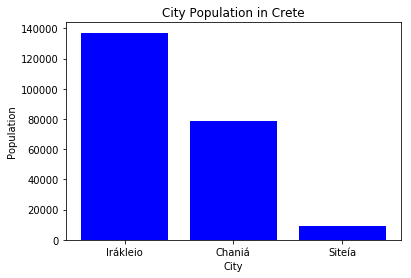

In [42]:
plt.bar("City_y", "Population", data = df_all, color = "blue")
plt.xlabel("City")
plt.ylabel("Population")
plt.title("City Population in Crete")
plt.show()

In [102]:
CLIENT_ID = 'UNAQRHGMKHONR5Z50SOGUO0PBMQBVSJ4LNDRNSUTUM413ON4'   #using Foursquare IDs to access nearby venues 
CLIENT_SECRET = 'SCGMNGOWMABI2OLHZ0NJ1UAJTPAJSWGZD2TDVJBSVCRL4TLP' 
VERSION = '20200727'
LIMIT = 100
radius = 200


In [108]:
venues =[]
for name,lat,lng in zip(df_all ['City_y'],df_all ['Latitude'],df_all ['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()['response']['groups'][0]['items']
    for i in results:
        venues.append([
            name, 
            lat, 
            lng, 
            i['venue']['name'], 
            i['venue']['location']['lat'], 
            i['venue']['location']['lng'],  
            i['venue']['categories'][0]['name']])

In [109]:
venues_near =pd.DataFrame.from_records(venues)
venues_near.columns = ['City_y', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
venues_near.head()

,City_y,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Irákleio,35.338082,25.133029,Chop Chop,35.338783,25.132699,BBQ Joint
1,Irákleio,35.338082,25.133029,Κιρκόρ,35.339189,25.133116,Bougatsa Shop
2,Irákleio,35.338082,25.133029,Frankly Cafe,35.337853,25.131265,Coffee Shop
3,Irákleio,35.338082,25.133029,Crumb,35.339399,25.133493,Bakery
4,Irákleio,35.338082,25.133029,Beer o' clock,35.339815,25.132857,Pub


In [110]:
venues_near.shape

(396, 7)

In [111]:
venues_near.groupby('City_y').count().head() #summary of our search of venues 

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City_y,,,,,,
Agía Foteiní,4,4,4,4,4,4
Anógeia,12,12,12,12,12,12
Chaniá,30,30,30,30,30,30
Chóra Sfakíon,2,2,2,2,2,2
Geráni,10,10,10,10,10,10


In [112]:
venues_onehot = pd.get_dummies(venues_near[['Venue Category']], prefix="", prefix_sep="")

venues_onehot['City_y'] = venues_near['City_y']
 
list_columns = venues_onehot.columns.tolist()
list_columns.remove('City_y')
new_list=['City_y']
new_list.extend(list_columns)
venues_onehot = venues_onehot[new_list]
venues_onehot.head()

,City_y,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Garden,Betting Shop,Bookstore,Bougatsa Shop,...,Snack Place,Souvlaki Shop,Sports Bar,Supermarket,Tapas Restaurant,Taverna,Trail,Vacation Rental,Vegetarian / Vegan Restaurant,Vineyard
0,Irákleio,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Irákleio,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Irákleio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Irákleio,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Irákleio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
venues_near.rename (columns={'City_y':'City_y'},inplace=True) #merge the two tables of latitude and longitude with boroughs and neighborhood
df_merge = pd.merge(df_all,venues_near,on='City_y')
df_merge.head()

   

,Census 2011,Region,City_x,City_y,Latitude,Longitude,Country,Iso2,Capital,Population,...,Use,ICAO,IATA,Coordinates,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,...,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E,35.338082,25.133029,Chop Chop,35.338783,25.132699,BBQ Joint
1,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,...,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E,35.338082,25.133029,Κιρκόρ,35.339189,25.133116,Bougatsa Shop
2,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,...,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E,35.338082,25.133029,Frankly Cafe,35.337853,25.131265,Coffee Shop
3,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,...,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E,35.338082,25.133029,Crumb,35.339399,25.133493,Bakery
4,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,Greece,GR,admin,137154.0,...,Civil/Military,LGIR,HER,35°20′23″N 25°10′49″E﻿ / ﻿35.33972°N 25.18028°E,35.338082,25.133029,Beer o' clock,35.339815,25.132857,Pub


In [126]:
del df_merge ['Capital']
del df_merge['Use']
del df_merge['Coordinates']
del df_merge['Country']

In [127]:
df_merge

,Census 2011,Region,City_x,City_y,Latitude,Longitude,Population,Pop_proper,Name,ICAO,IATA,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,Chop Chop,35.338783,25.132699,BBQ Joint
1,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,Κιρκόρ,35.339189,25.133116,Bougatsa Shop
2,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,Frankly Cafe,35.337853,25.131265,Coffee Shop
3,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,Crumb,35.339399,25.133493,Bakery
4,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,Beer o' clock,35.339815,25.132857,Pub
5,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,EscapeRooms.gr,35.338903,25.134155,General Entertainment
6,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,Barρακί,35.338503,25.132046,Meze Restaurant
7,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,Apiri,35.338431,25.131101,Modern Greek Restaurant
8,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,ΠολυΤεχνείο,35.339158,25.131582,Bar
9,140730,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,LGIR,HER,35.338082,25.133029,Anamnesia,35.338750,25.134085,Gift Shop


In [132]:
df_merge


,Region,City_x,City_y,Latitude,Longitude,Population,Pop_proper,Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Chop Chop,35.338783,25.132699,BBQ Joint
1,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Κιρκόρ,35.339189,25.133116,Bougatsa Shop
2,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Frankly Cafe,35.337853,25.131265,Coffee Shop
3,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Crumb,35.339399,25.133493,Bakery
4,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Beer o' clock,35.339815,25.132857,Pub
5,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,EscapeRooms.gr,35.338903,25.134155,General Entertainment
6,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Barρακί,35.338503,25.132046,Meze Restaurant
7,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Apiri,35.338431,25.131101,Modern Greek Restaurant
8,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,ΠολυΤεχνείο,35.339158,25.131582,Bar
9,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Anamnesia,35.338750,25.134085,Gift Shop


In [180]:
df_ending= df_merge[df_merge['Venue Category'].str.contains('Bar',regex=False)] 
df_ending

,Region,City_x,City_y,Latitude,Longitude,Population,Pop_proper,Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
8,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,ΠολυΤεχνείο,35.339158,25.131582,Bar
13,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,The Bitters Bar,35.338916,25.132975,Cocktail Bar
50,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,ΠολυΤεχνείο,35.339158,25.131582,Bar
55,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,The Bitters Bar,35.338916,25.132975,Cocktail Bar
92,Crete,Chania,Irákleio,35.338082,25.133029,137154.0,131654.0,Chania International Airport,35.338082,25.133029,ΠολυΤεχνείο,35.339158,25.131582,Bar
97,Crete,Chania,Irákleio,35.338082,25.133029,137154.0,131654.0,Chania International Airport,35.338082,25.133029,The Bitters Bar,35.338916,25.132975,Cocktail Bar
134,Crete,Chania,Irákleio,35.338082,25.133029,137154.0,131654.0,Chania International Airport,35.338082,25.133029,ΠολυΤεχνείο,35.339158,25.131582,Bar
139,Crete,Chania,Irákleio,35.338082,25.133029,137154.0,131654.0,Chania International Airport,35.338082,25.133029,The Bitters Bar,35.338916,25.132975,Cocktail Bar
231,Crete,Heraklion,Siteía,35.208507,26.103024,8833.0,8707.0,Heraklion International Airport,35.208507,26.103024,3d Boutique,35.207610,26.103689,Sports Bar
238,Crete,Heraklion,Siteía,35.208507,26.103024,8833.0,8707.0,Heraklion International Airport,35.208507,26.103024,3d Boutique,35.207610,26.103689,Sports Bar


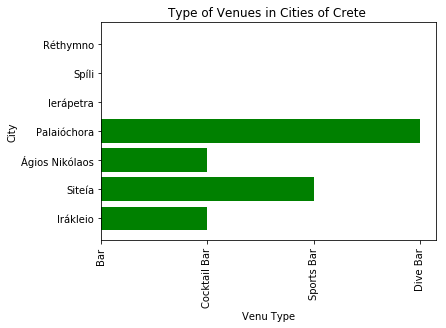

In [198]:
plt.barh("City_y", 'Venue Category', data = df_ending, color = "green")
plt.xlabel("Venu Type")
plt.ylabel("City")
plt.title("Type of Venues in Cities of Crete ")
plt.xticks(rotation=90)
plt.show()

In [185]:
df_ending1= df_merge[df_merge['Venue Category'].str.contains('Restaurant',regex=False)] 
df_ending1

,Region,City_x,City_y,Latitude,Longitude,Population,Pop_proper,Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Barρακί,35.338503,25.132046,Meze Restaurant
7,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Apiri,35.338431,25.131101,Modern Greek Restaurant
10,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Via Pastarella,35.339666,25.133024,Italian Restaurant
18,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,vranas,35.336860,25.133067,Seafood Restaurant
23,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Δίπολο,35.338315,25.131974,Cretan Restaurant
26,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Άλλα κι Άλλα,35.338580,25.132047,Meze Restaurant
28,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Σαρανταυγά,35.337634,25.133195,Greek Restaurant
30,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,50 - 50,35.338092,25.133186,Greek Restaurant
33,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Αθάλη,35.336926,25.132874,Cretan Restaurant
36,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Φιρί Φιρί,35.338586,25.131531,Meze Restaurant


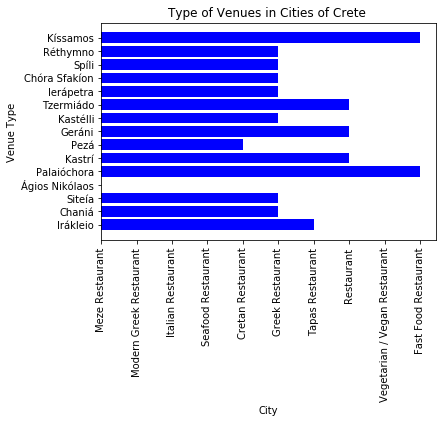

In [186]:
plt.barh("City_y", 'Venue Category', data = df_ending1, color = "blue")
plt.xlabel("City")
plt.ylabel("Venue Type")
plt.title("Type of Venues in Cities of Crete ")
plt.xticks(rotation=90)
plt.show()

In [187]:
clustering_data = venues_onehot_grouped.drop('City_y',1)
kmeans = KMeans(n_clusters = 2,random_state=0).fit(clustering_data)
kmeans.labels_

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int32)

In [188]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [190]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City_y']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
City_sorted = pd.DataFrame(columns=columns)
City_sorted['City_y'] = venues_onehot_grouped['City_y']

for ind in np.arange(venues_onehot_grouped.shape[0]):
    City_sorted.iloc[ind, 1:] = return_most_common_venues(venues_onehot_grouped.iloc[ind, :], num_top_venues)

City_sorted.head()

,City_y,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agía Foteiní,Furniture / Home Store,Café,Vineyard,Cosmetics Shop,Grocery Store
1,Anógeia,Hotel,Mountain,Plaza,Taverna,Café
2,Chaniá,Café,Bakery,Gym,Lounge,Dessert Shop
3,Chóra Sfakíon,Greek Restaurant,Vineyard,Historic Site,Grocery Store,Gift Shop
4,Geráni,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop


In [194]:
City_sorted['labels'] = kmeans.labels_
merged_df = pd.merge(df_merge, City_sorted,on='City_y')
merged_df.head()

,Region,City_x,City_y,Latitude,Longitude,Population,Pop_proper,Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,labels
0,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Chop Chop,35.338783,25.132699,BBQ Joint,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
1,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Κιρκόρ,35.339189,25.133116,Bougatsa Shop,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
2,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Frankly Cafe,35.337853,25.131265,Coffee Shop,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
3,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Crumb,35.339399,25.133493,Bakery,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
4,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Beer o' clock,35.339815,25.132857,Pub,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1


In [195]:
cluster_0 = merged_df.loc[merged_df['labels']==0,:]
cluster_0

,Region,City_x,City_y,Latitude,Longitude,Population,Pop_proper,Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,labels
412,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,κοντεκα καφέ,35.516686,23.878382,Coffee Shop,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
413,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,To Steki,35.517003,23.877159,Restaurant,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
414,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,Αιδόνησος,35.516535,23.878210,Greek Restaurant,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
415,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,Tassos,35.516919,23.877955,Greek Restaurant,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
416,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,passa tempo,35.516853,23.877835,Burger Joint,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
417,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,κοντεκα καφέ,35.516686,23.878382,Coffee Shop,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
418,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,To Steki,35.517003,23.877159,Restaurant,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
419,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,Αιδόνησος,35.516535,23.878210,Greek Restaurant,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
420,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,Tassos,35.516919,23.877955,Greek Restaurant,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0
421,Crete,Heraklion,Geráni,35.516772,23.878027,NaN,NaN,Heraklion International Airport,35.516772,23.878027,passa tempo,35.516853,23.877835,Burger Joint,Greek Restaurant,Coffee Shop,Burger Joint,Restaurant,Cosmetics Shop,0


In [196]:
cluster_1 = merged_df.loc[merged_df['labels']==1,:]
cluster_1

,Region,City_x,City_y,Latitude,Longitude,Population,Pop_proper,Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,labels
0,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Chop Chop,35.338783,25.132699,BBQ Joint,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
1,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Κιρκόρ,35.339189,25.133116,Bougatsa Shop,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
2,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Frankly Cafe,35.337853,25.131265,Coffee Shop,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
3,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Crumb,35.339399,25.133493,Bakery,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
4,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Beer o' clock,35.339815,25.132857,Pub,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
5,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,EscapeRooms.gr,35.338903,25.134155,General Entertainment,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
6,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Barρακί,35.338503,25.132046,Meze Restaurant,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
7,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Apiri,35.338431,25.131101,Modern Greek Restaurant,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
8,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,ΠολυΤεχνείο,35.339158,25.131582,Bar,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
9,Crete,Heraklion,Irákleio,35.338082,25.133029,137154.0,131654.0,Heraklion International Airport,35.338082,25.133029,Anamnesia,35.338750,25.134085,Gift Shop,Café,Meze Restaurant,Bakery,Greek Restaurant,Ice Cream Shop,1
